In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn import tree

In [14]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes) 
X = auto_mpg.data.features
y = auto_mpg.data.targets
data = pd.concat([X, y], axis=1)
data.dropna(inplace=True)
X = data.drop(columns=['mpg']).values
y = data['mpg'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
scaler_X = MinMaxScaler().fit(X_train)
scaler_y = MinMaxScaler().fit(y_train.reshape(-1, 1))
X_train, X_test = scaler_X.transform(X_train), scaler_X.transform(X_test)
y_train, y_test = scaler_y.transform(y_train.reshape(-1, 1)), scaler_y.transform(y_test.reshape(-1, 1))

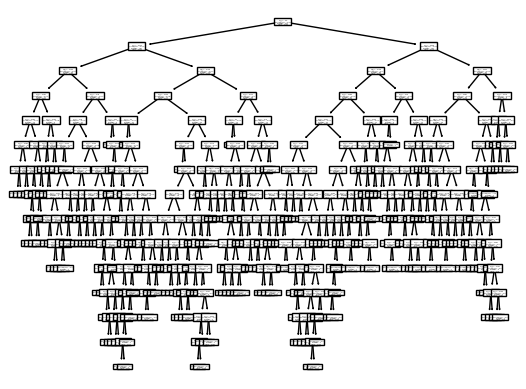

In [19]:
model = DecisionTreeRegressor(criterion='squared_error')
model.fit(X_train, y_train)
tree.plot_tree(model)
plt.show()

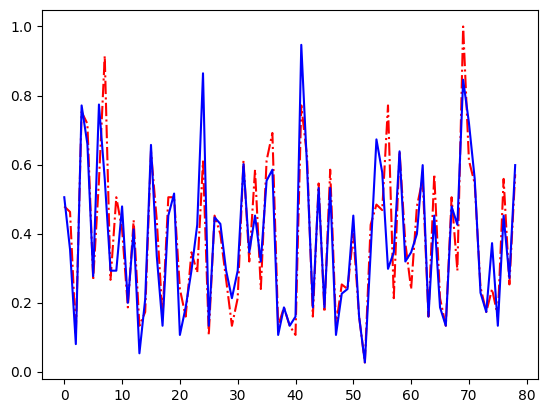

In [20]:
y_pre = model.predict(X_test)
plt.plot(y_pre , 'r-.')
plt.plot(y_test , 'b')